# Filtro Laplaciano: implementação e discussões

## Introdução

O filtro de laplace pode ser entendido como um filtro passa-alta, mediante sua características de atenuar intereferências abaixo da frequência de corte do filtro. É um operador linear, cujo seu desenvolvimento está pautado em conceitos de diferenciação no domínio do tempo discreto.

Enquanto a aplicação do filtros de média podem ser entendidos como uma integração o laplaciano representa uma derivação do sinal, em específico uma derivação de segunda ordem, representada no domínio do tempo discreto por:

$$\frac{\partial^2 f}{\partial x^2} = f(x) +  f(x-1) - 2f(x)$$

Porém, para o caso de sinais bidimensionais, como a imagem, e utilizando o conceito de 8 adjacentes vizinhos, temos:

$$\frac{\partial^2 f}{\partial x^2} = f(x+1,y) + f(x-1,y) - 2f(x)$$
$$\frac{\partial^2 f}{\partial x^2} = f(x+1,y+1) + f(x-1,y+1) - 2f(x)$$

$$\frac{\partial^2 f}{\partial x^2} = f(x,y+1) + f(x,y-1) - 2f(x)$$
$$\frac{\partial^2 f}{\partial x^2} = f(x-1,y+1) + f(x-1,y-1) - 2f(x)$$

O efeito derivativo final é a soma das derivadas parciais. Dessa forma, isto pode ser traduzido para o kernel do filtro ser representado da seguinte forma:

$$\ \begin{array}{ccc}
......... x-1 & x & x+1.... \end{array} \ $$

$$\ \begin{array}{ccc}
y-1 ...\\
y   ...\\
y+1 ...\end{array} 
\left( \begin{array}{ccc}
1 & 1 & 1 \\
1 & -8 & 1 \\
1 & 1 & 1 \end{array} \right)\ $$


A aplicação do filtro segue da mesma forma que o filtro da média, uma representação da adaptada da convolução digital para imagens.

## Implementação (Código fonte)

Importação dos pacotes utilizados para simulação:

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math as m
import navFunc as nf
from navFunc.cls import cls
from IPython.display import Image

Carregar imagem utilizando a função do OpenCV:

In [2]:
img = cv2.imread('lena.png',cv2.IMREAD_GRAYSCALE)

### Definições preliminares:
- Definir tamanho do kernel utilizado
- Definir número de aplicações do filtro

In [3]:
# Cria variavel do tipo struct (similar ao matlab):

Filter = nf.structtype()                

Filter.img = np.array(img)

Filter.imgSize = nf.structtype()
Filter.imgSize.lin, Filter.imgSize.col = Filter.img.shape

#################### Filtro da média
# Kernel def:

Filter.kernelSize = 3

# Número de aplicações do filtro
numAp = 1;

# Variável auxiliar para guardar a saída
U = np.zeros((numAp, Filter.imgSize.lin, Filter.imgSize.col))

### Aplicação efetida do método:

In [4]:
#############################################################################################
########### Method apllication:

for k in range(0, numAp):
    if k == 0:
        U[k,:,:] = nf.filterLaplace(Filter)
        print(U[k, :, :])
    else:
        Filter.img = U[k-1,:,:]
        U[k, :, :] = nf.filterLaplace(Filter)
        print(U[k,:,:])



################################
Process finished
Filter have been applied
################################
[[ 217.  233.  236. ...,  246.  247.  231.]
 [ 227.    2.  250. ...,  254.    6.  230.]
 [ 234.  252.    2. ...,  255.    2.  242.]
 ..., 
 [ 182.  253.  253. ...,    1.    0.  214.]
 [ 180.    1.    2. ...,    1.  255.  221.]
 [ 133.  184.  181. ...,  225.  224.  196.]]


### Exibir resultados:

- Imagem original:

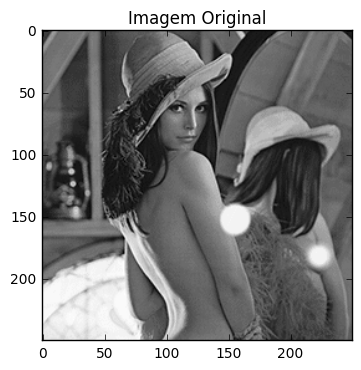

In [5]:
######### Using matplotlib #################
plt.figure(1)
plt.imshow(img, 'gray')
plt.title('Imagem Original')
plt.show()

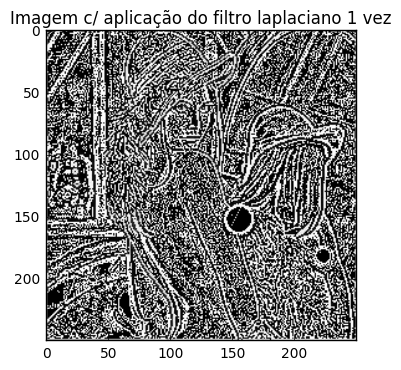

In [6]:
plt.figure(2)
plt.imshow(U[(numAp - 1),:,:], 'gray')
plt.title('Imagem c/ aplicação do filtro laplaciano %d vez' %numAp)
plt.show()

#### Apêndice 01 - Função para cálculo do filtro laplaciano:

In [7]:
def filterLaplace (Filter):
    ### Imports
    import numpy as np
    import matplotlib.pyplot as plt
    import math as m
    import navFunc as nf

    # Load image into numpy matrix

    A = Filter.img

    size = nf.structtype()
    size.A = nf.structtype()
    size.A.lin, size.A.col = A.shape

    #################### Laplace filter
    ## Pre-set steps:
    Filter.kernel = np.ones((Filter.kernelSize, Filter.kernelSize))
    Filter.kernel[int(Filter.kernelSize/2), int(Filter.kernelSize/2)] = -1*(np.sum(Filter.kernel)-1)
    #################
    central = m.floor((Filter.kernelSize / 2))

    C = np.zeros((size.A.lin + central * 2, size.A.col + central * 2))
    C[(0 + central):(size.A.lin + central), (0 + central):(size.A.col + central)] = A

    #################
    ##  Run the kernel over the matrix (similar to convolution):
    #################
    soma = 0;
    D = np.zeros(A.shape)

    for j in range((0), size.A.lin):
        for k in range((0), size.A.col):
            # Run kernel in one matrix's elements
            for kl in range(0, Filter.kernelSize):
                for kk in range(0, Filter.kernelSize):                   

                    soma = (C[j + kl, k + kk] * Filter.kernel[kl, kk]) + soma

            value = m.ceil((soma / (Filter.kernelSize * Filter.kernelSize)))
            soma = 0
            D[j, k] = value

    D = np.uint8(D)

    print('################################')
    print('Process finished')
    print('Filter have been applied')
    print('################################')

    return D

## Discussões sobre o método

Por possuir efeito derivativo, a aplicação do filto de Laplace ressalta específicamente transições. Analogamenta a derivada(taxa de variação) no regime de tempo contínuo, transições abruptas, como em um degrau, possuem elevados valores de derivadas e situações de constância apresentam valores nulos de derivadas. Este conceito é traduzido no domínio de imagens da seguinte forma: transições representam mudanças em valores de pixels, ou ainda variações na escala de cinza.

Esta característica confere ao filtro a capacidade de ressaltar contornos de forma eficaz, visto que em geral contornos(bordas) em objetos dentro de uma imagem são transições de valores na intensidade dos pixels. O exemplo a seguir exibe de forma clara o funcionamento do filtro.

## Operações do filtro de laplace em uma imagem

- Definição da mascara:

Imagem original:


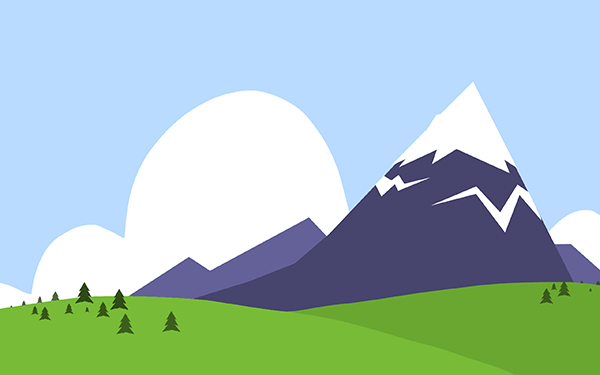

In [8]:
print("Imagem original:")
Image(filename='mountain-small.png')

################################
Process finished
Filter have been applied
################################


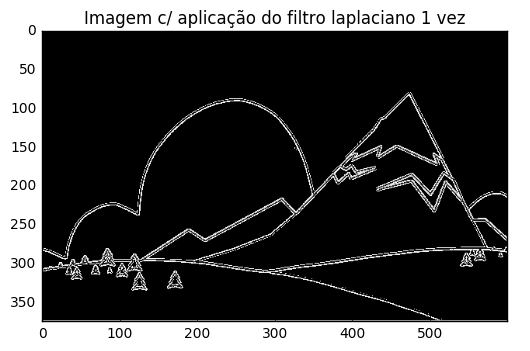

In [9]:
Filter.img = cv2.imread('mountain-small.png',cv2.IMREAD_GRAYSCALE)
U2 = nf.filterLaplace(Filter)

plt.figure(2)
plt.imshow(U2, 'gray')
plt.title('Imagem c/ aplicação do filtro laplaciano 1 vez')
plt.show()

O resultado está de acordo com as definições posteriores do filtro: regições de transição que apresentavam valores de intensidade bastante diferentes nos pixels próximos(derivada elevada) foram realçadas, ou contrário de regiões que tinham valores de intensidade próximos foram desprezadas(derivada nula).

## Quanto ao tamanho do kernel:

Submentendo uma imagem a uma variação do tamanho kernel constata-se o seguinte: máscaras de tamanhos menores, como 3x3, impactam bastante em uma imagem complexa, tornanda pouco visível, pois máscaras menores realçam regiões contidas em si. Enquanto que máscaras maiores os contornos principais da imagem, resultando em uma possível identificação e relação com a imagem original.

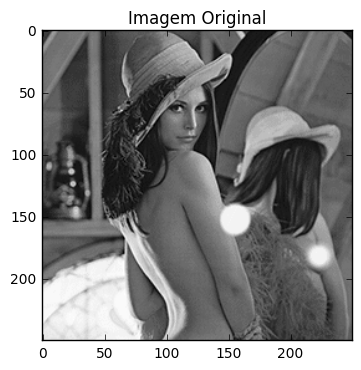

In [10]:
plt.figure(1)
plt.imshow(img, 'gray')
plt.title('Imagem Original')
plt.show()

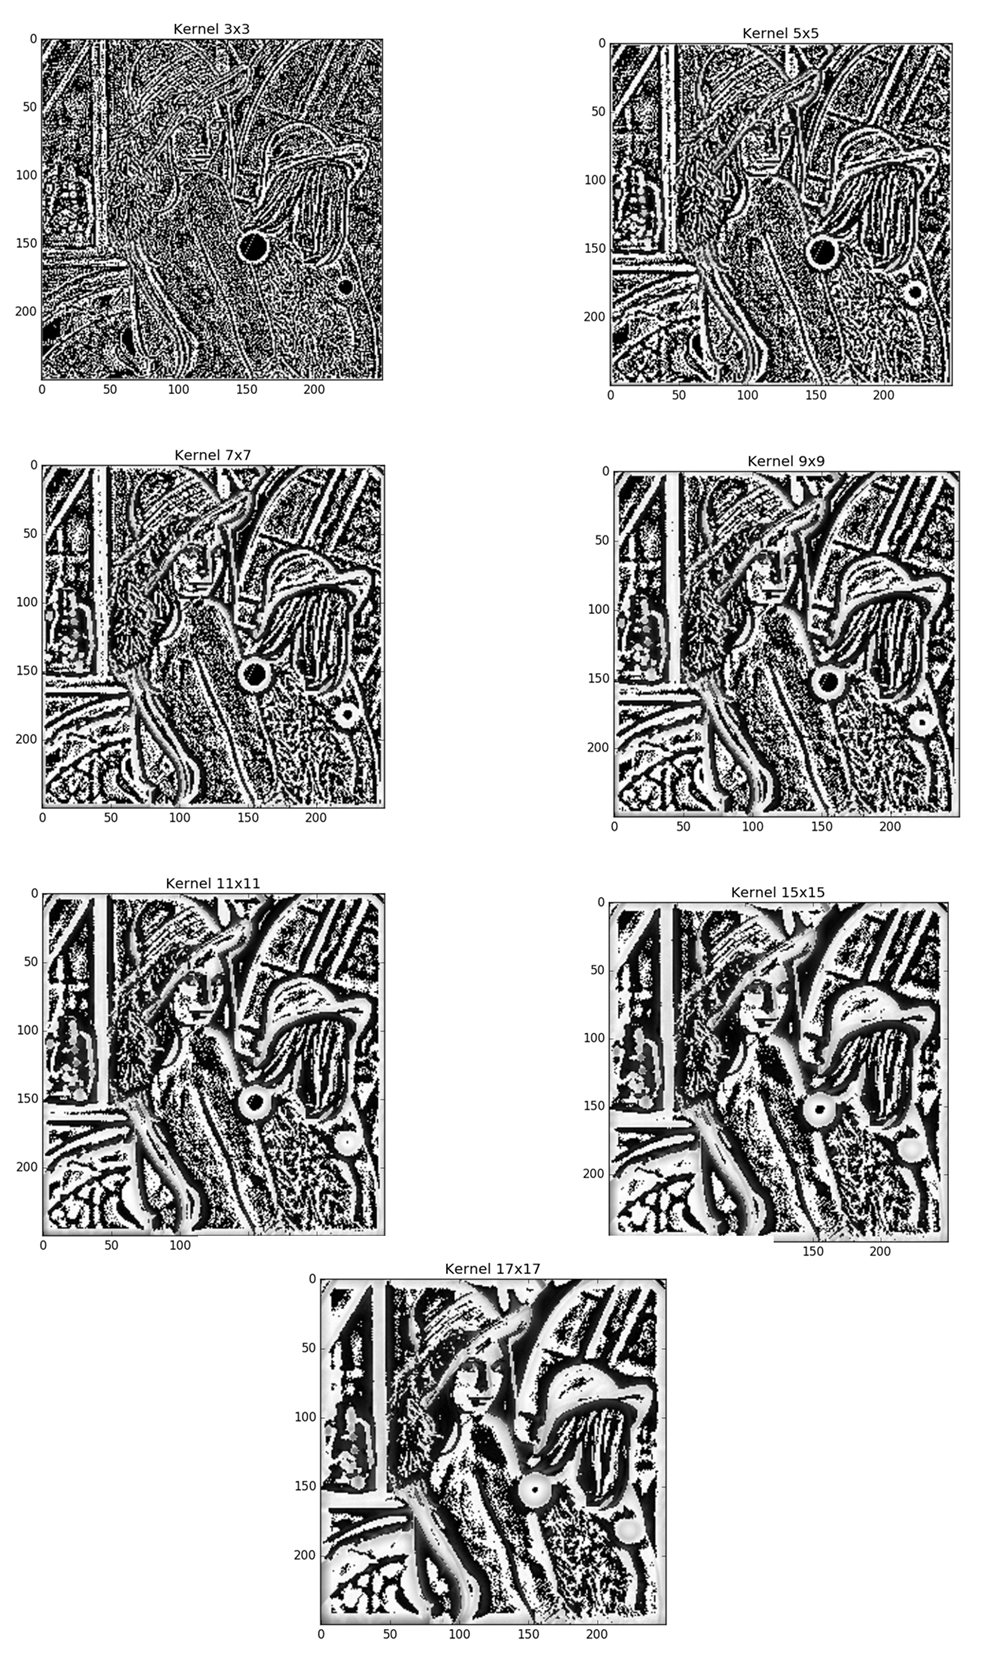

In [11]:
Image(filename='02.png')

### Quanto a aplicações sucessivas do filtro:

Diversas aplicaçãoes do filtro recursivamente na mesma imagem demonstram que realmente há um realce em regiões de tarnsições, porém a partir de dado limite o execessivo trabalho do filtro passa corrompter a imagem original, como exibi-se a seguir.

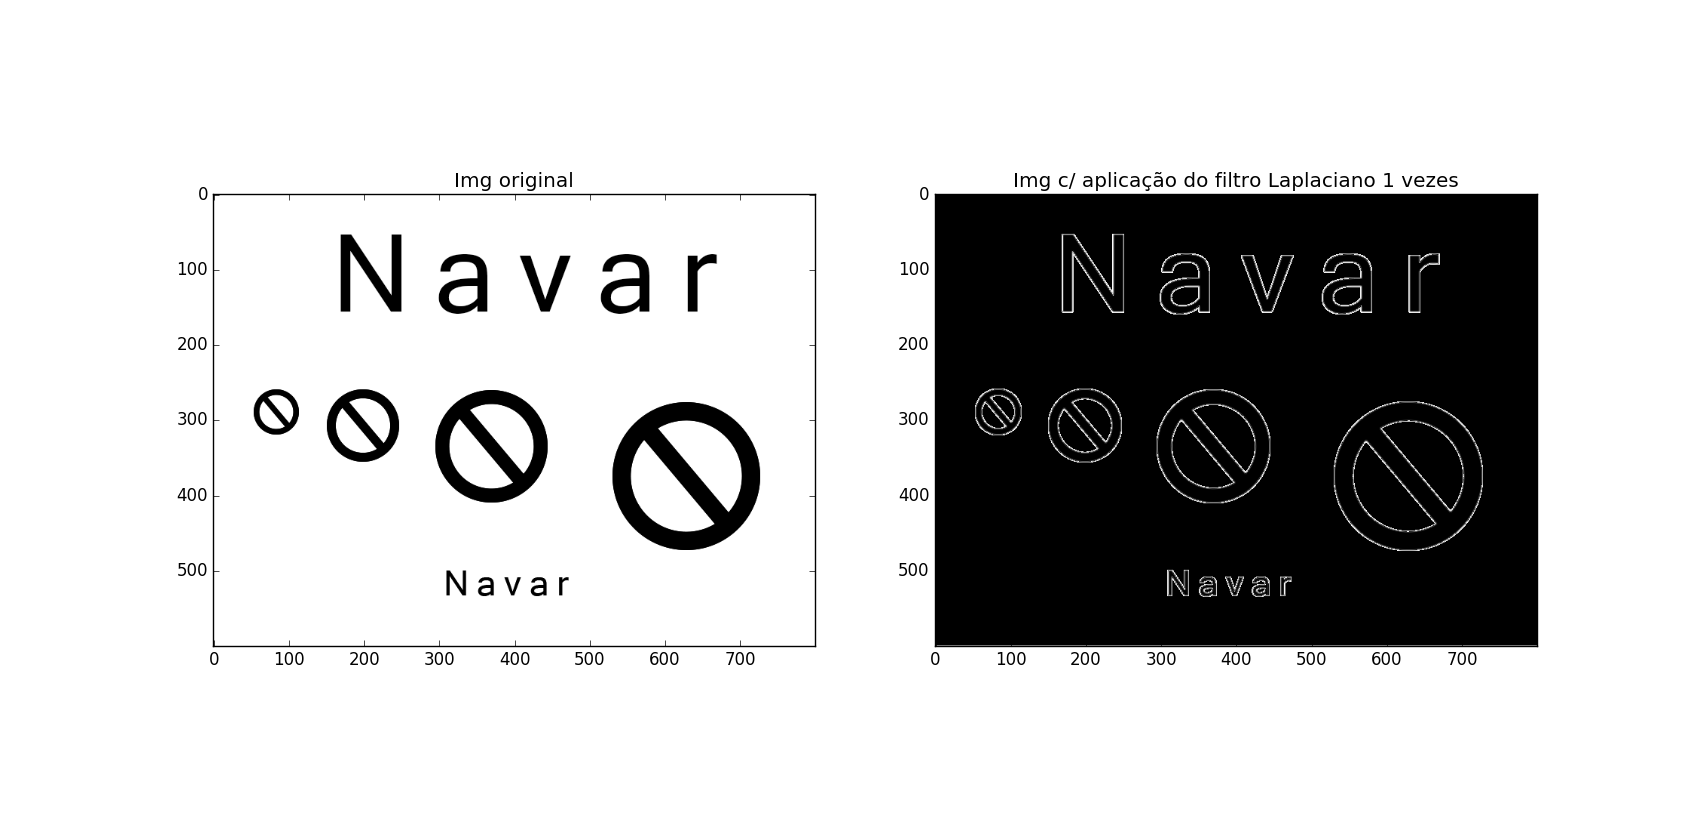

In [12]:
Image(filename='navar-filterLaplace02.png')

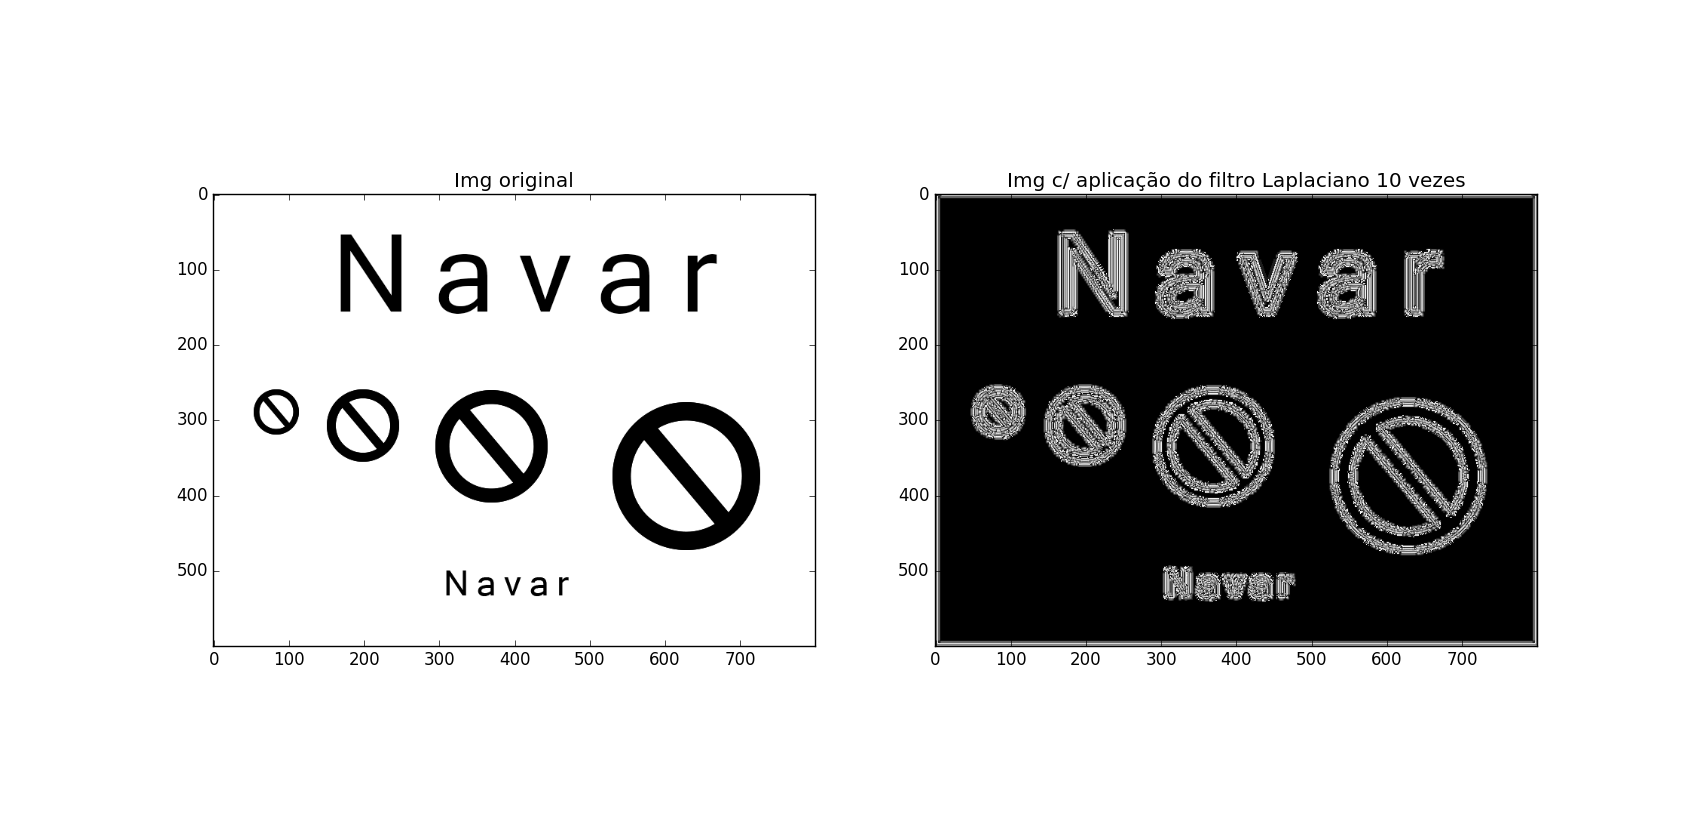

In [13]:
Image(filename='navar-filterLaplace01.png')

## Evidências durante aplicações

A adição da imagem resultante da aplicação do filtro de Laplace, em formato de "negativo", com a a imagem original demonstra um efeito de realce, preservando as áreas que foram desprezadas inicialmente.

Imagem original


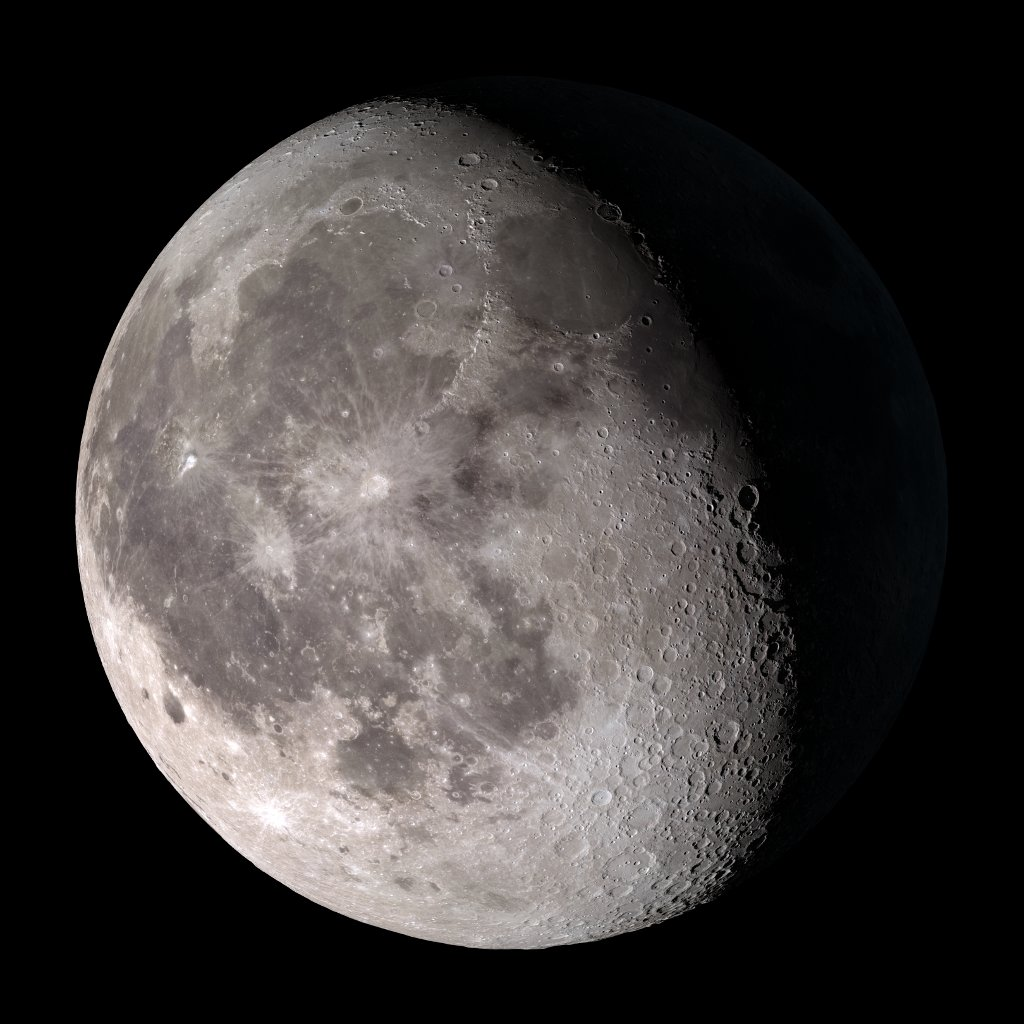

In [14]:
print('Imagem original')
Image(filename='moon.jpg')

Imagem final: soma da original com resultante do filtro de laplace com kernel de 11x11 1 vez.


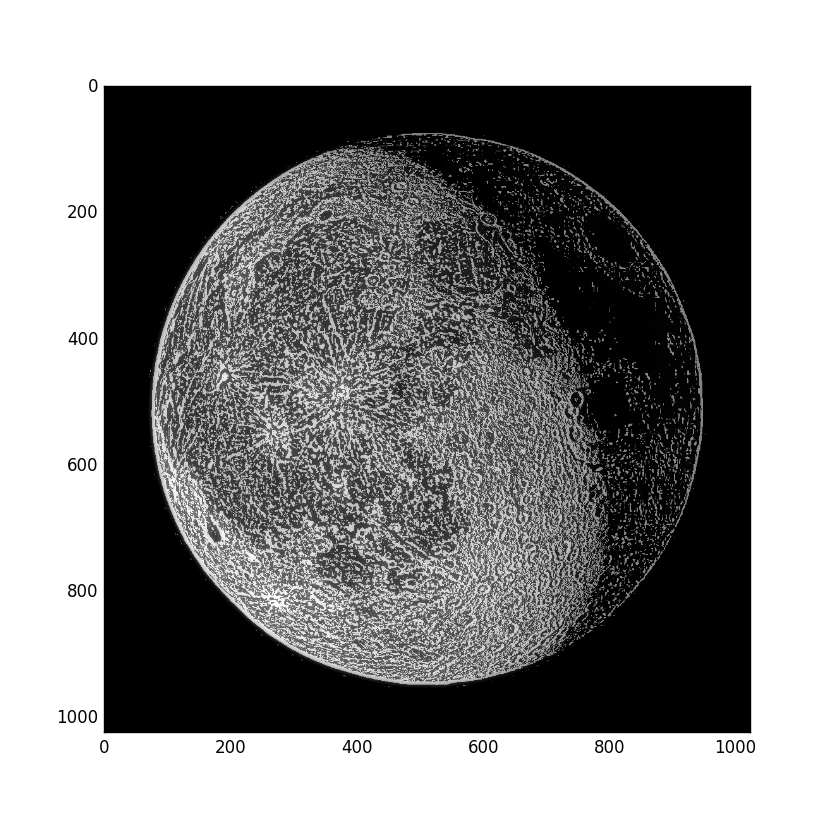

In [15]:
print('Imagem final: soma da original com resultante do filtro de laplace com kernel de 11x11 1 vez.')
Image(filename='moon-filterLaplace.png')

## Conclusões

Por ser um operador derivatido de segunda ordem o filtro Laplaciano ressalta transições muito bem, atenuando regiões cuja não há mudanças de intesidade luminosa, por tal razão diz-se que é do tipo passa-alta. Comparativamente aos filtros Gaussiano e Mediana sua operação pode ser entendida como complementar: (i) Laplace ressalta bordas e "atribui" intensidade nula a regiões constantes, mas também favorece a aparição de ruídos; (ii) os filtros de borrar tendem a retirar ruído, porém atenuam as transições, tendendo a deixar a imagem homogênea(paleta de cores).